<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%9F%D1%80%D0%BE%D0%B4%D0%B2%D0%B8%D0%BD%D1%83%D1%82%D1%8B%D0%B9_%D1%83%D1%80%D0%BE%D0%B2%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регрессионный анализ. Продвинутый уровень

# Линейная регрессия

**Регрессия** — одна из трех основных задач машинного обучения наряду с классификацией и кластеризацией, предназначенная для предсказания числовых значений целевой переменной на основе одной или нескольких независимых переменных. Цель линейной регрессии — установить линейную зависимость между признаками и целевой переменной, чтобы сделать прогноз для новых данных.

### Типы линейной регрессии

1. **Простая линейная регрессия**: Модель содержит одну независимую переменную.
2. **Множественная линейная регрессия**: Модель содержит несколько независимых переменных.

Линейная регрессия является одним из самых простых и популярных методов регрессии, благодаря понятности и простоте интерпретации. Модель линейной регрессии подбирает коэффициенты (веса) для независимых переменных, минимизируя среднеквадратичную ошибку между предсказанными и фактическими значениями.

### Определение задачи регрессии

Задача предсказания значения целевой переменной $t$ на основе вектора признаков $x$ называется задачей регрессии. Для этого входные признаки $x$ (например, характеристики дома) используются для предсказания целевого значения $t$ (например, цена дома). Линейная регрессия сводится к построению "линии наилучшего соответствия", проходящей через набор точек данных.

## Данные

Модель линейной регрессии обучается на **датасете** — наборе данных, содержащем информацию о независимых переменных и целевой переменной. Датасет состоит из наблюдений $(x, t)$, где:
- $x$ — вектор предикторов (признаков),
- $t$ — целевая переменная.

### Разделение данных

Часто данные делят на три подмножества:
1. **Обучающая выборка (Training set)**: используется для подбора параметров модели.
2. **Валидационная выборка (Validation set)**: служит для настройки гиперпараметров и предотвращения переобучения.
3. **Тестовая выборка (Test set)**: предназначена для окончательной оценки модели после завершения обучения.

Рекомендуемые соотношения деления:
- Обучающая выборка — 60-80%
- Валидационная выборка — 10-20%
- Тестовая выборка — 10-20%

## Постановка задачи регрессии

Пусть значение целевой переменной $t$ для вектора $x$ описывается детерминированной функцией $y(x, w)$ с добавлением гауссовского шума $\varepsilon$:
$$
t = y(x, w) + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, \sigma^2)
$$
Здесь:
- $y(x, w)$ — детерминированная функция, зависящая от параметров $w$,
- $\varepsilon$ — нормально распределенный шум с дисперсией $\sigma^2$.


# Нормально распределенный шум: теоретические основы

Термин "нормально распределенный шум" описывает случайную величину $\varepsilon$, подчиняющуюся нормальному (гауссовскому) распределению. Математически это записывается как $\varepsilon \sim \mathcal{N}(\mu, \sigma^2)$, где $\mu$ представляет математическое ожидание, а $\sigma^2$ — дисперсию. В контексте моделирования обычно предполагается, что $\mu = 0$, если не указано иное.

#### Функция плотности вероятности

Плотность вероятности нормально распределенной случайной величины задается выражением:

$$
f(\varepsilon) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\varepsilon - \mu)^2}{2\sigma^2}\right),
$$

где:
- $\mu$ определяет положение центра распределения,
- $\sigma^2$ характеризует разброс значений вокруг центра,
- $\exp(x)$ обозначает экспоненциальную функцию ($e^x$).

При $\mu = 0$ формула упрощается до:

$$
f(\varepsilon) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\varepsilon^2}{2\sigma^2}\right).
$$

#### Интерпретация в моделях

Нормально распределенный шум часто используется для моделирования случайных возмущений в данных. Например, в задачах регрессии наблюдаемая переменная $y$ может быть представлена как:

$$
y = f(x) + \varepsilon,
$$

где $f(x)$ — детерминированная компонента, а $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ — случайный шум, добавляемый к модели.

#### Свойства параметров распределения

1. **Математическое ожидание ($\mu$):**
   Параметр $\mu$ определяет смещение распределения относительно нуля. Если $\mu = 0$, распределение становится симметричным относительно начала координат.

2. **Дисперсия ($\sigma^2$):**
   Дисперсия $\sigma^2$ влияет на ширину "колоколообразной" кривой. Увеличение $\sigma^2$ приводит к более широкому разбросу значений случайной величины.

#### Оценка параметров по выборке

Если доступна выборка значений $\{\varepsilon_1, \varepsilon_2, \dots, \varepsilon_n\}$, параметры $\mu$ и $\sigma^2$ могут быть оценены следующим образом:

1. **Оценка математического ожидания ($\mu$):**
   $$
   \hat{\mu} = \frac{1}{n} \sum_{i=1}^n \varepsilon_i.
   $$

2. **Оценка дисперсии ($\sigma^2$):**
   $$
   \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (\varepsilon_i - \hat{\mu})^2.
   $$

Таким образом, нормальное распределение является фундаментальным инструментом в статистике и машинном обучении благодаря своей универсальности и удобству анализа. Его плотность вероятности полностью определяется двумя параметрами: математическим ожиданием $\mu$ и дисперсией $\sigma^2$.

Финальная формула плотности вероятности имеет вид:

$$
\boxed{f(\varepsilon) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\varepsilon - \mu)^2}{2\sigma^2}\right).}
$$

#Продолжение
**Вероятностная интерпретация модели** заключается в том, что вероятность наблюдения конкретного значения $t$ при известных $x$, $w$ и $\sigma^2$ описывается нормальным распределением:
$$
p(t|x, w, \sigma^2) = \mathcal{N}(y(x, w), \sigma^2)
$$
В большинстве случаев предполагается, что дисперсия ошибки $\sigma^2$ постоянна (гомоскедастичность). Если дисперсия зависит от значений $x$ — это **гетероскедастичность**. В случае гетероскедастичности применяют методы, учитывающие изменяющуюся дисперсию, например, взвешенную регрессию.

### Проверка гомоскедастичности и гетероскедастичности

**Визуальные методы**:  
- **График остатков** — если остатки распределены случайно и равномерно вокруг оси, то присутствует гомоскедастичность. Отклонения указывают на гетероскедастичность.
- **Q-Q график** — помогает оценить нормальность распределения остатков.

**Статистические тесты**:  
- **Тест Бреуша-Пагана** и **тест Голдфелда-Квандта** помогают проверить гомоскедастичность на статистически значимом уровне.
  
  
## Построение функции $y(x, w)$

Задача линейной регрессии заключается в построении функции вида:
$$
y(x, w) \to \mathbb{R}
$$
где $w$ — вектор параметров функции, а $x$ — вектор характеристик (признаков) объекта.

Наиболее часто используемая форма линейной функции:
$$
y(x, w) = w_0 + w_1 x_1 + \ldots + w_D x_D = w_0 + \sum_{i=1}^D w_i \cdot x_i
$$
где:
- $y(x, w)$ — предсказанное значение целевой переменной (таргета),
- $x = (x_1, \ldots, x_D)$ — вектор признаков,
- $w_1, \ldots, w_D, w_0$ — параметры модели.

Признаки также называют **фичами** (от англ. features). Вектор $w = (w_1, \ldots, w_D)$ часто называют вектором **весов**, так как модель можно интерпретировать как взвешенную сумму признаков объекта. Число $w_0$ называется **свободным членом** или **сдвигом** (bias).

**Примечание.** Свободный член $w_0$ иногда опускают, добавляя ко всем $x_i$ признак, тождественно равный единице. В таком случае роль $w_0$ будет выполнять соответствующий вес:
$$
\begin{pmatrix}x_{1} & \ldots & x_{D} \end{pmatrix}\cdot\begin{pmatrix}w_1\\ \vdots \\ w_D\end{pmatrix} + w_0 =
\begin{pmatrix}1 & x_{1} & \ldots & x_{D} \end{pmatrix}\cdot\begin{pmatrix}w_0 \\ w_1 \\ \vdots \\ w_D \end{pmatrix}
$$



## Базисные функции (Basis Functions)

Базисные функции в линейной регрессии представляют собой преобразования, которые применяются к исходным признакам (входным переменным), чтобы перенести их в новое пространство признаков. Это позволяет модели лучше улавливать сложные зависимости между входными данными и целевой переменной, обеспечивая более точные предсказания. Введение базисных функций в линейную модель особенно полезно, когда между исходными признаками и целевой переменной нет простой линейной зависимости. С их помощью можно расширить пространство признаков и создать более точную и гибкую модель.

### Модель линейной регрессии с базисными функциями

Для включения базисных функций модель линейной регрессии может быть записана следующим образом:
$$
y(x, w) = w_0 + \sum_{j=1}^{M-1} w_j \cdot \phi_j(x) = w^T \phi(x),
$$
где вектор $\phi(x)$ определяется как:
$$
\phi(x) = (\phi_0(x), \phi_1(x), \ldots, \phi_{M-1}(x))^T,
$$
при этом $\phi_0(x) = 1$, что позволяет учесть свободный член модели $w_0$.

Параметры модели $w$ также представлены вектором:
$$
w = (w_0, w_1, \ldots, w_{M-1})^T.
$$



Давайте разберем несколько конкретных примеров для $ w^T \phi(x) $, чтобы лучше понять, как это работает. Мы рассмотрим разные случаи: линейную модель, полиномиальную модель и модель с нелинейными базисными функциями.



### Пример 1: Линейная модель
#### Дано:
- Входное значение: $ x = 2 $,
- Базисные функции: $\phi_0(x) = 1$, $\phi_1(x) = x$,
- Параметры модели: $ w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} = \begin{bmatrix} 3 \\ 4 \end{bmatrix} $.

#### Вектор $\phi(x)$:
$$
\phi(x) =
\begin{bmatrix}
\phi_0(x) \\
\phi_1(x)
\end{bmatrix}
=
\begin{bmatrix}
1 \\
x
\end{bmatrix}
=
\begin{bmatrix}
1 \\
2
\end{bmatrix}.
$$

#### Вычисление $ w^T \phi(x) $:
$$
w^T \phi(x) =
\begin{bmatrix} 3 & 4 \end{bmatrix}
\cdot
\begin{bmatrix} 1 \\ 2 \end{bmatrix}
= 3 \cdot 1 + 4 \cdot 2 = 3 + 8 = 11.
$$

#### Результат:
$$
y(x, w) = 11.
$$



### Пример 2: Полиномиальная модель (квадратичная)
#### Дано:
- Входное значение: $ x = -1 $,
- Базисные функции: $\phi_0(x) = 1$, $\phi_1(x) = x$, $\phi_2(x) = x^2$,
- Параметры модели: $ w = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \end{bmatrix} = \begin{bmatrix} 1 \\ -2 \\ 3 \end{bmatrix} $.

#### Вектор $\phi(x)$:
$$
\phi(x) =
\begin{bmatrix}
\phi_0(x) \\
\phi_1(x) \\
\phi_2(x)
\end{bmatrix}
=
\begin{bmatrix}
1 \\
x \\
x^2
\end{bmatrix}
=
\begin{bmatrix}
1 \\
-1 \\
(-1)^2
\end{bmatrix}
=
\begin{bmatrix}
1 \\
-1 \\
1
\end{bmatrix}.
$$

#### Вычисление $ w^T \phi(x) $:
$$
w^T \phi(x) =
\begin{bmatrix} 1 & -2 & 3 \end{bmatrix}
\cdot
\begin{bmatrix} 1 \\ -1 \\ 1 \end{bmatrix}
= 1 \cdot 1 + (-2) \cdot (-1) + 3 \cdot 1 = 1 + 2 + 3 = 6.
$$

#### Результат:
$$
y(x, w) = 6.
$$



### Пример 3: Модель с нелинейными базисными функциями
#### Дано:
- Входное значение: $ x = \pi/4 $ (угол в радианах),
- Базисные функции: $\phi_0(x) = 1$, $\phi_1(x) = \sin(x)$, $\phi_2(x) = \cos(x)$,
- Параметры модели: $ w = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \end{bmatrix} = \begin{bmatrix} 2 \\ -1 \\ 3 \end{bmatrix} $.

#### Вектор $\phi(x)$:
$$
\phi(x) =
\begin{bmatrix}
\phi_0(x) \\
\phi_1(x) \\
\phi_2(x)
\end{bmatrix}
=
\begin{bmatrix}
1 \\
\sin(x) \\
\cos(x)
\end{bmatrix}
=
\begin{bmatrix}
1 \\
\sin(\pi/4) \\
\cos(\pi/4)
\end{bmatrix}
=
\begin{bmatrix}
1 \\
\sqrt{2}/2 \\
\sqrt{2}/2
\end{bmatrix}.
$$

#### Вычисление $ w^T \phi(x) $:
$$
w^T \phi(x) =
\begin{bmatrix} 2 & -1 & 3 \end{bmatrix}
\cdot
\begin{bmatrix} 1 \\ \sqrt{2}/2 \\ \sqrt{2}/2 \end{bmatrix}
= 2 \cdot 1 + (-1) \cdot \frac{\sqrt{2}}{2} + 3 \cdot \frac{\sqrt{2}}{2}.
$$

Упрощаем:
$$
w^T \phi(x) = 2 - \frac{\sqrt{2}}{2} + \frac{3\sqrt{2}}{2} = 2 + \frac{2\sqrt{2}}{2} = 2 + \sqrt{2}.
$$

#### Результат:
$$
y(x, w) = 2 + \sqrt{2}.
$$



### Пример 4: Множественные наблюдения
#### Дано:
- Входные значения: $ x_1 = 1 $, $ x_2 = 2 $, $ x_3 = 3 $,
- Базисные функции: $\phi_0(x) = 1$, $\phi_1(x) = x$, $\phi_2(x) = x^2$,
- Параметры модели: $ w = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} $.

#### Матрица $\Phi$:
Для каждого $x_i$ вычисляем $\phi(x_i)$:
$$
\phi(x_1) =
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}, \quad
\phi(x_2) =
\begin{bmatrix}
1 \\
2 \\
4
\end{bmatrix}, \quad
\phi(x_3) =
\begin{bmatrix}
1 \\
3 \\
9
\end{bmatrix}.
$$

Матрица $\Phi$:
$$
\Phi =
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 4 \\
1 & 3 & 9
\end{bmatrix}.
$$

#### Вычисление прогнозов:
$$
y = \Phi w =
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 4 \\
1 & 3 & 9
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}.
$$

Выполняем умножение:
$$
y =
\begin{bmatrix}
1 \cdot 1 + 1 \cdot 2 + 1 \cdot 3 \\
1 \cdot 1 + 2 \cdot 2 + 4 \cdot 3 \\
1 \cdot 1 + 3 \cdot 2 + 9 \cdot 3
\end{bmatrix}
=
\begin{bmatrix}
6 \\
17 \\
34
\end{bmatrix}.
$$

#### Результат:
$$
y =
\begin{bmatrix}
6 \\
17 \\
34
\end{bmatrix}.
$$



### Итог
Примеры показывают, как $ w^T \phi(x) $ используется для вычисления прогнозов в разных случаях. Важно помнить:
- $ w $ — вектор параметров (столбец или строка, в зависимости от контекста),
- $ \phi(x) $ — вектор базисных функций (всегда столбец).


### Зачем нужны базисные функции?

Использование базисных функций позволяет решать несколько важных задач:

1. **Моделирование сложных зависимостей.** Базисные функции помогают выявить сложные нелинейные зависимости между входными признаками и целевой переменной, делая модель более гибкой.
   
2. **Повышение точности предсказаний.** Применение различных базисных функций увеличивает способность модели подстраиваться под данные, улучшая точность прогнозов.
   
3. **Снижение ошибки модели.** Введение базисных функций способствует уменьшению ошибки, позволяя более точно описывать закономерности в данных.
   
4. **Улучшение обобщающей способности.** Базисные функции позволяют модели лучше обобщать на новые данные, особенно если исходные признаки не подчиняются простой линейной зависимости.

### Примеры базисных функций

Существует несколько распространённых типов базисных функций, полезных для разных задач линейной регрессии:

1. **Полиномиальные базисные функции.** Полиномы позволяют моделировать нелинейные зависимости, добавляя степени признаков в качестве новых базисных функций:
$$
   \phi(x) = (1, x, x^2, x^3, \ldots).
$$

2. **Радиально-базисные функции (RBF).** Эти функции полезны для аппроксимации сложных нелинейных зависимостей, так как каждая RBF сосредоточена вокруг определённого значения признака:
$$
   \phi(x) = \left(e^{-\frac{(x - \mu_1)^2}{2\sigma^2}}, e^{-\frac{(x - \mu_2)^2}{2\sigma^2}}, \ldots\right),
$$
   где $\mu_i$ — центр функции, а $\sigma$ — параметр ширины функции.

3. **Сплайн-функции.** Сплайны делят пространство признаков на интервалы и строят отдельные полиномы для каждого из них, плавно соединяя их между собой. Они полезны для моделирования зависимостей, изменяющихся в разных диапазонах данных:
$$
   \phi(x) = \begin{cases}
      p_1(x), & x < k_1 \\
      p_2(x), & k_1 \leq x < k_2 \\
      \dots \\
      p_n(x), & x \geq k_{n-1}
   \end{cases}
$$
   где $k_i$ — узлы, а $p_i(x)$ — полиномы на каждом интервале.

4. **Синусоидальные базисные функции.** Для анализа периодических данных используются синусоидальные функции, особенно полезные для моделирования сезонных или циклических процессов:
$$
   \phi(x) = (\sin(\omega_1 x), \cos(\omega_1 x), \sin(\omega_2 x), \cos(\omega_2 x), \ldots),
$$
   где $\omega_i$ — частоты, задающие периодичность.

5. **Логистические базисные функции.** Эти функции подходят для задач, где зависимость резко изменяется при переходе через определённые значения, например, для биологических или социальных процессов. Функция имеет вид:
$$
   \phi(x) = \frac{1}{1 + e^{-(x - \mu)/\sigma}},
$$
   где $\mu$ — центр, а $\sigma$ — параметр, регулирующий крутизну перехода.

Эти базисные функции дают модели возможность учитывать разнообразные типы зависимостей, от полиномиальных до периодических, локальных и пороговых.

### Варианты моделей с базисными функциями

Рассмотрим примеры применения базисных функций в линейной регрессии.

#### 1. Линейная регрессия с исходными признаками

В стандартной линейной регрессии в качестве базисных функций можно использовать сами исходные признаки. Для признаков $x_1, x_2, \ldots, x_D$ базисные функции определяются так:
$$
\phi_1(x) = x_1, \quad \phi_2(x) = x_2, \quad \ldots, \quad \phi_D(x) = x_D.
$$
Здесь базисные функции представляют исходные переменные, а модель остаётся линейной по параметрам $w$.

#### 2. Полиномиальная регрессия с одной переменной

Полиномиальная регрессия расширяет линейную модель, добавляя степени исходной переменной в качестве базисных функций. Это позволяет учитывать нелинейные зависимости от переменной:
$$
\phi_1(x) = x, \quad \phi_2(x) = x^2, \quad \ldots, \quad \phi_K(x) = x^K.
$$
Каждая степень переменной $x$ становится новой базисной функцией, увеличивая степень нелинейности модели.

#### 3. Регрессия с радиально-базисными функциями (RBF-регрессия)

Радиально-базисные функции обеспечивают моделирование локальных зависимостей. Каждая RBF-функция определяется центром $\mu_i$ и шириной $\sigma$, создавая «пик» вблизи $\mu_i$. Это полезно для задач с локальными изменениями зависимостей:
$$
\phi(x) = \left(e^{-\frac{(x - \mu_1)^2}{2\sigma^2}}, e^{-\frac{(x - \mu_2)^2}{2\sigma^2}}, \ldots, e^{-\frac{(x - \mu_K)^2}{2\sigma^2}}\right).
$$
RBF-регрессия особенно эффективна для аппроксимации данных, где зависимость меняется локально, как в задачах географического моделирования.

#### 4. Сплайн-регрессия

Сплайн-регрессия использует полиномы, которые адаптируются в каждом из заданных интервалов (узлов). Это помогает избежать чрезмерного роста значений на краях, что часто наблюдается в полиномиальных моделях. В сплайн-регрессии на каждом интервале применяется свой полином, плавно соединённый с соседними:
$$
\phi(x) = \begin{cases}
      p_1(x), & x < k_1 \\
      p_2(x), & k_1 \leq x < k_2 \\
      \dots \\
      p_n(x), & x \geq k_{n-1}
   \end{cases}.
$$
Сплайн-регрессия подходит для данных, где зависимость может значительно изменяться в разных диапазонах.

#### 5. Синусоидальные базисные функции

Для задач анализа временных рядов или периодических данных полезны синусоидальные функции. Эти базисные функции захватывают повторяющиеся тренды, такие как сезонные изменения:
$$
\phi(x) = (\sin(\omega_1 x), \cos(\omega_1 x), \sin(\omega_2 x), \cos(\omega_2 x), \ldots),
$$
где $\omega_i$ — частоты, задающие периодичность.

#### 6. Регрессия с логистическими базисными функциями

Логистические базисные функции применяются для задач, в которых зависимость резко изменяется при переходе через пороговые значения. Они полезны для моделирования плав

ных переходов, характерных для социальных или биологических процессов:
$$
\phi(x) = \frac{1}{1 + e^{-(x - \mu)/\sigma}}.
$$
Логистические функции позволяют модели плавно описывать скачки или пороговые эффекты, делая её гибкой для работы с нелинейными данными.
Таким образом, выбор подходящих базисных функций позволяет адаптировать линейную регрессию под задачи с различной степенью сложности. Полиномиальные, радиально-базисные, сплайновые, синусоидальные и логистические функции создают разнообразные способы моделирования зависимости, от простой до сильно нелинейной.


## Матрица плана (Design Matrix)

Матрица плана, или матрица признаков, обозначаемая как $X$, представляет собой таблицу значений всех независимых переменных (факторов или признаков) для каждого наблюдения в модели линейной регрессии. Каждая строка этой матрицы соответствует одному наблюдению (например, объекту или записи в выборке), а каждый столбец — отдельному фактору, который может быть представлен в исходном виде или преобразован базисной функцией.

### Структура матрицы плана

Для классической линейной регрессии матрица плана $X$ имеет размерность $n \times (p+1)$, где $n$ — количество наблюдений, а $p$ — количество факторов (включая свободный член). Структура стандартной матрицы плана выглядит так:

$$
X = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix},
$$

где первый столбец состоит из единиц (это bias term, или смещение), представляющий свободный член $w_0$ в модели, а остальные столбцы содержат значения факторов для каждого наблюдения.

### Функции и задачи матрицы плана

Матрица плана играет ключевую роль в линейной регрессии, облегчая расчётные операции и позволяя использовать методы линейной алгебры для построения модели. Основные её функции:

1. **Оценка параметров модели.** С помощью матрицы плана можно вычислить параметры $w$ линейной регрессии с использованием метода наименьших квадратов, минимизируя отклонения между реальными значениями целевой переменной и предсказанными значениями модели. Оценка параметров $w$ производится по формуле:
$$
   \hat{w} = (X^T X)^{-1} X^T y,
$$
   где $y$ — вектор значений целевой переменной, $X^T$ — транспонированная матрица плана. Позже мы подробно рассмотрим, как получить эту оценку.

2. **Учет множества факторов.** Матрица плана позволяет модели регрессии учитывать несколько факторов одновременно, что повышает её гибкость и даёт возможность рассматривать влияние различных переменных на целевую переменную.

3. **Проведение статистических тестов.** Через матрицу плана можно проводить статистические тесты, чтобы оценить значимость коэффициентов регрессионной модели, определяя, какие из факторов оказывают статистически значимое влияние на целевую переменную.

### Матрица плана с базисными функциями

В случае использования базисных функций структура матрицы плана изменяется, поскольку каждый фактор может быть представлен нелинейными преобразованиями, что позволяет модели захватывать сложные зависимости между признаками и целевой переменной. В этом случае матрица плана, также называемая матрицей базисных функций и обозначаемая как $\Phi(x)$, имеет следующий вид:

$$
\Phi(x) = \begin{bmatrix}
\phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \dots & \phi_p(x_1) \\
\phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \dots & \phi_p(x_2) \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\phi_0(x_n) & \phi_1(x_n) & \phi_2(x_n) & \dots & \phi_p(x_n)
\end{bmatrix},
$$

где:
- каждая строка соответствует одному наблюдению $x_i$,
- каждый столбец представляет значение базисной функции $\phi_j(x_i)$, применённой к признаку $x_i$.

### Примеры матрицы плана с базисными функциями

#### Полиномиальные базисные функции

Для полиномиальной регрессии, где базисные функции представляют собой степени переменной $x$, матрица плана будет выглядеть так:

$$
\Phi(x) = \begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^p \\
1 & x_2 & x_2^2 & \dots & x_2^p \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^p
\end{bmatrix}.
$$

#### Радиально-базисные функции (RBF)

В случае радиально-базисных функций, которые обычно используют для захвата локальных зависимостей в данных, каждая базисная функция фокусируется на определённой точке $\mu_j$, и матрица плана принимает вид:

$$
\Phi(x) = \begin{bmatrix}
e^{-\frac{(x_1 - \mu_1)^2}{2\sigma^2}} & e^{-\frac{(x_1 - \mu_2)^2}{2\sigma^2}} & \dots & e^{-\frac{(x_1 - \mu_p)^2}{2\sigma^2}} \\
e^{-\frac{(x_2 - \mu_1)^2}{2\sigma^2}} & e^{-\frac{(x_2 - \mu_2)^2}{2\sigma^2}} & \dots & e^{-\frac{(x_2 - \mu_p)^2}{2\sigma^2}} \\
\vdots & \vdots & \ddots & \vdots \\
e^{-\frac{(x_n - \mu_1)^2}{2\sigma^2}} & e^{-\frac{(x_n - \mu_2)^2}{2\sigma^2}} & \dots & e^{-\frac{(x_n - \mu_p)^2}{2\sigma^2}}
\end{bmatrix}.
$$

Здесь $\mu_j$ — центры радиально-базисных функций, а $\sigma$ регулирует их ширину.

### Преимущества матрицы плана с базисными функциями

Использование матрицы плана с базисными функциями даёт несколько преимуществ:

1. **Моделирование нелинейных зависимостей.** Преобразованные признаки позволяют регрессионной модели захватывать нелинейные зависимости между факторами и целевой переменной, делая её более гибкой и подходящей для моделирования сложных данных.

2. **Расширение возможностей анализа.** Базисные функции позволяют строить более сложные и точные модели, которые можно адаптировать для задач с различными типами данных и зависимостей.

3. **Повышение точности модели.** С добавлением базисных функций модель способна лучше подстраиваться под закономерности в данных, улучшая точность прогнозирования и обобщающую способность.

Таким образом, матрица плана с базисными функциями является мощным инструментом при построении моделей линейной регрессии, позволяя учитывать различные нелинейные преобразования исходных данных и повышать качество модели за счёт лучшего описания сложных зависимостей.



## Функция правдоподобия (Likelihood)

Функция правдоподобия — это мера того, насколько хорошо параметры модели $w$ объясняют наблюдаемые данные $t$ при известных значениях входных переменных $X$. В линейной регрессии обычно предполагается, что ошибки модели распределены нормально с математическим ожиданием 0 и дисперсией $\sigma^2$.


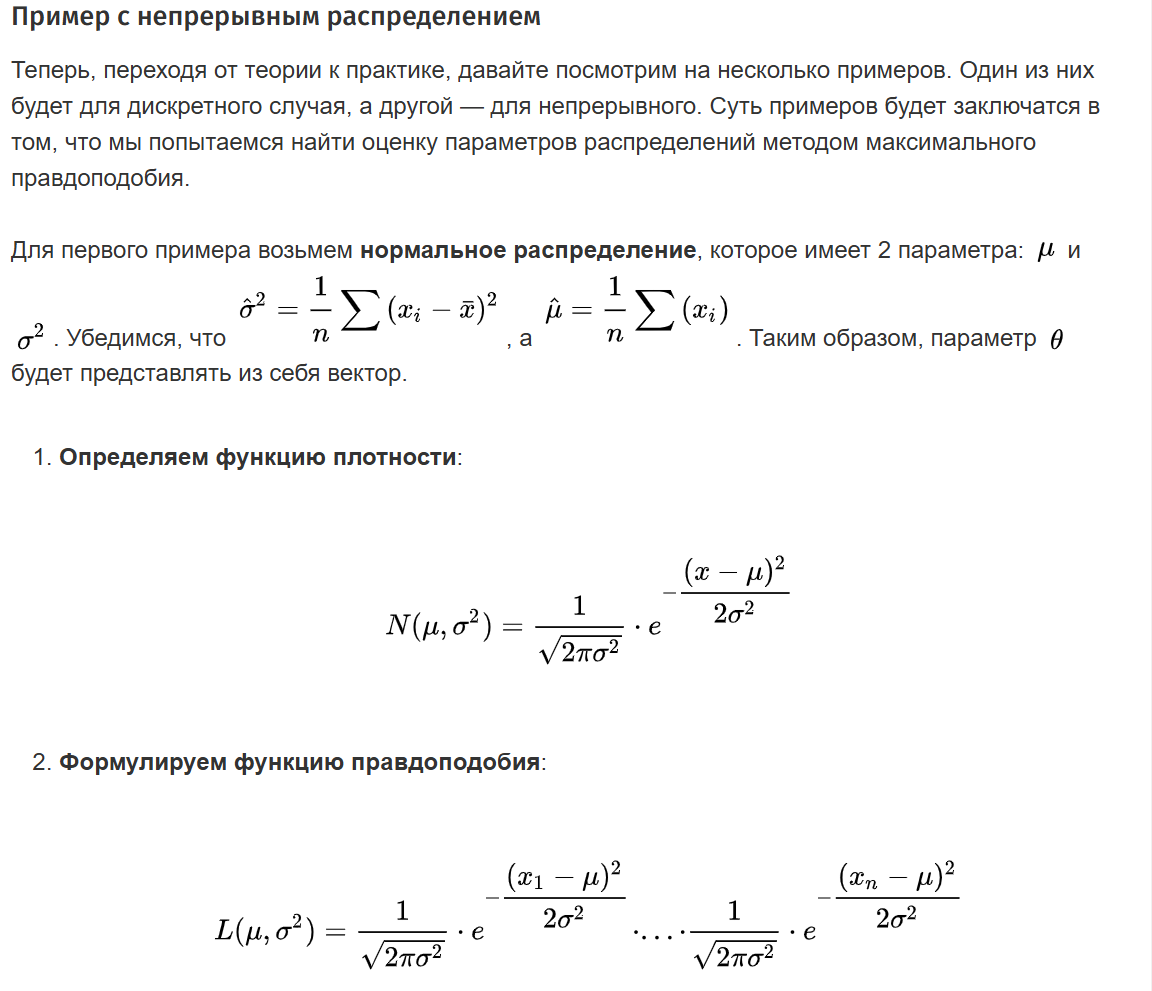


### Правдоподобие для одного наблюдения

Предположим, что каждое наблюдение $t_i$ имеет нормальное распределение с математическим ожиданием, заданным линейной моделью $y(x_i, w) = w^T \phi(x_i)$, и дисперсией $\sigma^2$. Тогда правдоподобие для одного наблюдения $t_i$, при заданных значениях $x_i$ и $w$, описывается функцией плотности вероятности нормального распределения:

$$
L(t_i | x_i, w) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(t_i - y(x_i, w))^2}{2\sigma^2}}.
$$


Давайте разберем этот пример более подробно и приведем числовой пример для функции правдоподобия одного наблюдения в случае нормального распределения.



### Пример: Нормальное распределение

Предположим, что у нас есть одно наблюдение $t_i = 5$, которое следует нормальному распределению с математическим ожиданием, заданным линейной моделью:

$$
y(x_i, w) = w^T \phi(x_i),
$$

где:
- $x_i$ — входное значение,
- $w$ — параметры модели,
- $\phi(x_i)$ — базисные функции (например, полиномиальные или другие).

Для простоты предположим, что:
- $x_i = 2$,
- $w = [1, 2]^T$ (вектор параметров),
- $\phi(x_i) = [1, x_i]^T$ (линейная базисная функция),
- $\sigma^2 = 1$ (дисперсия шума).

Тогда линейная модель принимает вид:
$$
y(x_i, w) = w^T \phi(x_i) = [1, 2] \cdot [1, 2]^T = 1 \cdot 1 + 2 \cdot 2 = 5.
$$

Таким образом, математическое ожидание $y(x_i, w) = 5$.

#### Функция правдоподобия:
Функция правдоподобия для одного наблюдения $t_i$ задается формулой плотности вероятности нормального распределения:
$$
L(t_i | x_i, w) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(t_i - y(x_i, w))^2}{2\sigma^2}}.
$$

Подставим известные значения:
- $t_i = 5$,
- $y(x_i, w) = 5$,
- $\sigma^2 = 1$.

Тогда:
$$
L(t_i | x_i, w) = \frac{1}{\sqrt{2\pi \cdot 1}} \cdot e^{-\frac{(5 - 5)^2}{2 \cdot 1}}.
$$

Упростим выражение:
1. Вычислим экспоненту:
   $$
   e^{-\frac{(5 - 5)^2}{2}} = e^{-\frac{0}{2}} = e^0 = 1.
   $$

2. Вычислим нормировочный множитель:
   $$
   \frac{1}{\sqrt{2\pi \cdot 1}} = \frac{1}{\sqrt{2\pi}} \approx 0.3989.
   $$

Итоговое значение правдоподобия:
$$
L(t_i | x_i, w) = 0.3989 \cdot 1 = 0.3989.
$$



### Анализ:
В данном случае наблюдение $t_i = 5$ полностью соответствует математическому ожиданию $y(x_i, w) = 5$, поэтому правдоподобие достигает своего максимального значения для данного $\sigma^2$. Если бы $t_i$ отклонялось от $y(x_i, w)$, то правдоподобие уменьшалось бы из-за экспоненциального члена в формуле.



### Обобщение:
Если бы $t_i \neq y(x_i, w)$, например, $t_i = 6$, то правдоподобие уменьшилось бы. Рассчитаем это для сравнения:

1. Подставим $t_i = 6$:
   $$
   L(t_i | x_i, w) = \frac{1}{\sqrt{2\pi}} \cdot e^{-\frac{(6 - 5)^2}{2}}.
   $$

2. Вычислим экспоненту:
   $$
   e^{-\frac{(6 - 5)^2}{2}} = e^{-\frac{1}{2}} \approx e^{-0.5} \approx 0.6065.
   $$

3. Умножим на нормировочный множитель:
   $$
   L(t_i | x_i, w) = 0.3989 \cdot 0.6065 \approx 0.242.
   $$

Таким образом, правдоподобие уменьшилось, так как $t_i = 6$ дальше от математического ожидания $y(x_i, w) = 5$.

Таким образом, функция правдоподобия показывает, насколько вероятно наблюдение $t_i$ при заданных параметрах модели $w$ и дисперсии $\sigma^2$. В данном примере мы увидели, что:
- При $t_i = 5$ правдоподобие максимально: $\boxed{0.3989}$,
- При $t_i = 6$ правдоподобие уменьшается: $\boxed{0.242}$.

### Полная функция правдоподобия

Функция правдоподобия для всей выборки из $n$ наблюдений — это произведение правдоподобий для каждого наблюдения:

$$
L(t | X, w) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(t_i - y(x_i, w))^2}{2\sigma^2}}.
$$

Подставив $y(x_i, w) = w^T \phi(x_i)$, мы получаем:

$$
L(t | X, w, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}}.
$$

### Логарифмирование функции правдоподобия

Вместо максимизации функции правдоподобия $L(t | X, w, \sigma^2)$ мы можем максимизировать её логарифм, что значительно упрощает вычисления. Логарифмирование преобразует произведение в сумму, что делает анализ и оптимизацию более управляемыми.

Рассчитаем логарифм функции правдоподобия:

$$
\ln L(t | X, w, \sigma^2) = \ln \left( \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}} \right).
$$

Применяя свойство логарифма $\ln (a \cdot b) = \ln a + \ln b$, получаем:

$$
\ln L(t | X, w, \sigma^2) = \sum_{i=1}^{n} \ln \left( \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}} \right).
$$

Теперь можем разложить логарифм произведения на сумму логарифмов:

$$
\ln L(t | X, w, \sigma^2) = \sum_{i=1}^{n} \left( \ln \frac{1}{\sqrt{2\pi\sigma^2}} + \ln e^{-\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}} \right).
$$

### Применение свойств логарифма

Воспользуемся двумя свойствами логарифма:

1. $\ln \frac{1}{a} = -\ln a$,
2. $\ln e^x = x$.

Используя эти свойства, получаем:

$$
\ln L(t | X, w, \sigma^2) = \sum_{i=1}^{n} \left( -\ln \sqrt{2\pi\sigma^2} - \frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2} \right).
$$

Теперь разложим первый член более подробно:

$$
\ln L(t | X, w, \sigma^2) = \sum_{i=1}^{n} \left( -\frac{1}{2} \ln (2\pi\sigma^2) - \frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2} \right).
$$

Раскрывая сумму, можно представить результат в виде двух отдельных слагаемых:

$$
\ln L(t | X, w, \sigma^2) = -\frac{n}{2} \ln (2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (t_i - w^T \phi(x_i))^2.
$$

### Окончательная логарифмическая функция правдоподобия

Итак, логарифм функции правдоподобия для линейной регрессии принимает следующий вид:

$$
\ln L(t | X, w, \sigma^2) = -\frac{n}{2} \ln (2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (t_i - w^T \phi(x_i))^2.
$$

Эта функция называется **логарифмической функцией правдоподобия**, и её удобно использовать для оптимизации параметров $w$ и $\sigma^2$ модели линейной регрессии, так как задача максимизации этой функции эквивалентна минимизации функции потерь:

$$
\mathcal{L}(w) = \frac{1}{2\sigma^2} \sum_{i=1}^{n} (t_i - w^T \phi(x_i))^2.
$$

Такое логарифмическое представление упрощает работу с функцией правдоподобия, особенно при использовании методов оптимизации, таких как градиентный спуск или аналитические методы для нахождения оптимальных параметров модели.

### Оптимизация параметров модели

Для нахождения оценок параметров $w$ и дисперсии ошибок $\sigma^2$ максимизируют логарифмическую функцию правдоподобия. Так как логарифмическая функция правдоподобия является убывающей функцией ошибки модели, это эквивалентно минимизации суммы квадратов отклонений, или функции потерь, для линейной регрессии.

В частности, целевая функция для минимизации, полученная из логарифмической функции правдоподобия, имеет вид:

$$
\mathcal{L}(w) = \frac{1}{2\sigma^2} \sum_{i=1}^{n} (t_i - w^T \phi(x_i))^2.
$$

### Преимущества логарифмирования функции правдоподобия

1. **Превращение произведения в сумму**: Логарифм позволяет преобразовать произведение плотностей вероятности для каждого наблюдения в сумму логарифмов. Это упрощает вычисления и делает задачу более устойчивой.

2. **Удобство для градиентного спуска и аналитического решения**: В большинстве задач, включая линейную регрессию, логарифмированная функция правдоподобия легче оптимизируется, так как её градиенты имеют более простую форму. Это упрощает поиск оптимальных параметров $w$.

3. **Стабильность при вычислениях**: Логарифмирование снижает риск ошибки округления при работе с очень малыми вероятностями, что может быть важно при большом объёме данных.

Таким образом, логарифмическая функция правдоподобия является важным инструментом для максимизации правдоподобия в линейной регрессии, позволяя находить такие значения параметров $w$, которые обеспечивают наилучшее объяснение имеющихся данных в рамках предположений модели.




## Минимизация целевой функции

Целевая функция (или функционал) в задачах оптимизации — это функция, которую необходимо минимизировать или максимизировать в зависимости от поставленной задачи. В контексте линейной регрессии целевая функция служит критерием для оценки того, насколько хорошо модель соответствует данным.

### Целевая функция линейной регрессии

В линейной регрессии целевая функция, отражающая ошибку предсказания, обычно представляется следующим образом:

$$
E(w) = \frac{1}{2} \sum_{i=1}^{N} \left( t_i - w^T \phi(x_i) \right)^2,
$$

где:
- $t_i$ — фактическое значение зависимой переменной для $i$-го наблюдения,
- $w$ — вектор параметров модели (коэффициентов),
- $\phi(x_i)$ — вектор базисных функций для $i$-го наблюдения.

Минимизация этой целевой функции позволяет найти оптимальные коэффициенты модели, которые наилучшим образом соответствуют данным, тем самым создавая наилучшую прямую (или плоскость в случае многомерной регрессии), описывающую зависимость между независимыми и зависимой переменными.

### Важность минимизации целевой функции

Минимизация целевой функции в линейной регрессии критически важна для нахождения значений коэффициентов, которые оптимально объясняют зависимую переменную на основе предикторов. Это позволяет строить модели, способные эффективно прогнозировать или анализировать зависимую переменную.

### Отличие целевой функции от функции потерь

Хотя целевая функция и функция потерь могут совпадать в некоторых случаях, они имеют разные роли в контексте оптимизации:

- **Целевая функция** — это общее понятие, описывающее функцию, которую необходимо минимизировать или максимизировать. В случае линейной регрессии целевая функция направлена на нахождение наилучших параметров модели для объяснения зависимости между переменными.
  
- **Функция потерь** — это более специфический термин, который обычно используется для оценки ошибок предсказания модели. Она показывает, насколько сильно предсказанные значения отличаются от фактических. В линейной регрессии функция потерь часто представляется в виде средней квадратичной ошибки (MSE), которая фактически является целевой функцией.

Таким образом, целевая функция может быть функцией потерь, но не всегда. В других задачах оптимизации целевая функция может иметь другие формы, в зависимости от контекста и требований.

### Методы оптимизации

Для минимизации целевой функции в линейной регрессии можно использовать различные методы оптимизации:

- **Метод наименьших квадратов (МНК)** — находит коэффициенты, минимизируя сумму квадратов ошибок.
- **Градиентный спуск** — итеративный метод, который обновляет параметры модели в направлении антиградиента функции потерь.
- **Нормальное уравнение** — аналитический метод, позволяющий находить оптимальные параметры без необходимости итераций.

После минимизации целевой функции и нахождения оптимальных значений коэффициентов модель становится более точной и эффективной в предсказании зависимой переменной на основе предикторов.

## Функция потерь

**Функция потерь** — это мера ошибок предсказания модели. В задаче регрессии такой мерой может служить расстояние между предсказанным значением $f(x)$ и его фактическим значением $y$.

Одной из распространенных функций потерь является **средняя квадратичная ошибка** (MSE), которая совпадает с нашей целевой функцией:

$$
\text{loss} = E(w) = \frac{1}{2} \sum_{i=1}^{N} \left( y_i - f(x_i) \right)^2,
$$

где:
- $y_i$ — фактическое значение зависимой переменной для $i$-го наблюдения,
- $f(x_i) = w^T \phi(x_i)$ — предсказанное значение зависимой переменной, полученное с использованием модели с параметрами $w$ и базисными функциями $\phi$.

### Оптимизация функции потерь

Поиск оптимальных параметров модели сводится к задаче нахождения минимума функции потерь. Это можно сделать с использованием различных алгоритмов оптимизации, в зависимости от требований к вычислительной эффективности и точности. Например, при использовании градиентного спуска параметры обновляются следующим образом:

$$
w^{(t+1)} = w^{(t)} - \eta \nabla E(w^{(t)}),
$$

где:
- $w^{(t)}$ — текущее значение параметров,
- $\eta$ — скорость обучения,
- $\nabla E(w^{(t)})$ — градиент функции потерь по параметрам.

Подробно рассмотрим метод градиентного спуска в следующих разделах.




## Поиск локального минимума

Рассмотрим нахождение локального минимума для простой линейной регрессии. Необходимым (но недостаточным) условием для нахождения локального минимума дифференцируемой функции является равенство нулю частных производных:

$$
\begin{equation*}
\begin{cases}
\displaystyle\frac{\partial E(w)}{\partial w_0} = 0, \$$5pt]
\displaystyle\frac{\partial E(w)}{\partial w_1} = 0.
\end{cases}
\end{equation*}
$$

Эти уравнения указывают на то, что для нахождения локального минимума производные функции потерь по всем параметрам должны равняться нулю. В случае среднеквадратичной ошибки (MSE) для линейной регрессии мы можем вычислить частные производные и определить точки, в которых функция достигает экстремумов.

Так как MSE для линейной регрессии является полиномом второй степени относительно параметров $w_0$ и $w_1$, можно утверждать, что локальный минимум будет одновременно и глобальным минимумом.

## Метод наименьших квадратов

Для простой линейной регрессии функция потерь обычно определяется как среднеквадратичная ошибка (Mean Squared Error, MSE) и имеет следующий вид:

$$
E(w) = \frac{1}{2} \sum_{i=1}^{n} \left( y_i - (w_0 + w_1 x_i) \right)^2,
$$

где:
- $E(w)$ — функция потерь, которую мы стремимся минимизировать при настройке параметров модели.
- $w$ — вектор параметров модели. В данном случае $w_0$ и $w_1$ — это коэффициенты регрессии, которые мы хотим определить.
- $n$ — количество наблюдений в нашем наборе данных.
- $y_i$ — фактическое значение зависимой переменной для $i$-го наблюдения.
- $x_i$ — значение независимой переменной для $i$-го наблюдения.
- Формула $y_i - (w_0 + w_1 x_i)$ представляет собой разницу между фактическим и предсказанным значением зависимой переменной для $i$-го наблюдения.
- Квадрат этой разницы используется для учета как положительных, так и отрицательных отклонений от фактического значения.
- Сумма квадратов ошибок (среднеквадратичная ошибка, MSE) дает общую меру того, насколько хорошо модель соответствует данным.

Наша цель заключается в подборе значений параметров $w_0$ и $w_1$ так, чтобы минимизировать эту функцию потерь, обеспечивая наилучшее соответствие модели данным.

### Оптимизация методом наименьших квадратов

Чтобы найти значения параметров $w_0$ и $w_1$, минимизирующие функцию потерь, мы можем использовать метод наименьших квадратов, который включает в себя следующие шаги:

1. **Запись функции потерь:** Определяем функцию потерь $E(w)$ как среднеквадратичную ошибку.

2. **Вычисление частных производных:** Вычисляем частные производные функции потерь по параметрам $w_0$ и $w_1$:

#### 1. Вычисление производных функции потерь по параметрам $w_0$ и $w_1$

Для нахождения оптимальных значений параметров $w_0$ и $w_1$ необходимо вычислить частные производные функции потерь $E(w)$:

$$
\frac{\partial E}{\partial w_0} = -\sum_{i=1}^{n} (y_i - (w_0 + w_1 x_i)),
$$

$$
\frac{\partial E}{\partial w_1} = -\sum_{i=1}^{n} x_i (y_i - (w_0 + w_1 x_i)).
$$

#### 2. Приравнивание производных к нулю и решение системы уравнений

После вычисления производных, приравниваем их к нулю и решаем систему уравнений:

$$
-\sum_{i=1}^{n} (y_i - (w_0 + w_1 x_i)) = 0,
$$

$$
-\sum_{i=1}^{n} x_i (y_i - (w_0 + w_1 x_i)) = 0.
$$

#### 3. Нахождение оптимальных значений $w_0$ и $w_1$

Решив полученную систему уравнений, можно найти оптимальные значения параметров $w_0$ и $w_1$, которые минимизируют функцию потерь MSE:

$$
w_1 = \frac{n \sum_{i=1}^{n} x_i y_i - \left( \sum_{i=1}^{n} x_i \right) \left( \sum_{i=1}^{n} y_i \right)}{n \sum_{i=1}^{n} x_i^2 - \left( \sum_{i=1}^{n} x_i \right)^2},
$$

$$
w_0 = \frac{\sum_{i=1}^{n} y_i - w_1 \left( \sum_{i=1}^{n} x_i \right)}{n}.
$$

Для повышения вычислительной эффективности часто используют матричный подход для определения модели линейной регрессии и выполнения последующего анализа.

### Матричный подход в линейной регрессии

Уравнения простой линейной регрессии можно записать в матричной форме следующим образом:

$$
Y = Xw + \varepsilon,
$$

где:
- $Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$ — вектор зависимой переменной.
- $X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$ — матрица независимых переменных, где первый столбец состоит из единиц для учета свободного члена.
- $w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$ — вектор коэффициентов модели.
- $\varepsilon = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix}$ — вектор ошибок модели.

### Связи между матрицами

Ранее мы нашли соотношения:

1. $\sum y_i = n w_0 + w_1 \sum x_i$

2. $\sum x_i y_i = w_0 \sum x_i + w_1 \sum x_i^2$

Известно, что:

$$
X^T \cdot X =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix} =
\begin{bmatrix}
n & \sum x_i \\
\sum x_i & \sum x_i^2
\end{bmatrix}
$$

$$
X^T \cdot Y =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix} =
\begin{bmatrix}
\sum y_i \\
\sum x_i y_i
\end{bmatrix}
$$

Таким образом, уравнения (1) и (2) эквивалентны следующей матричной формуле:

$$
X^T Y = X^T X w
$$

Отсюда мы можем получить:

$$
w = (X^T \cdot X)^{-1} \cdot X^T Y
$$

где:
- $w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$ — вектор коэффициентов модели (размерность $2 \times 1$, где первый элемент — свободный член, а второй — коэффициент при независимой переменной),
- $X$ — матрица независимых переменных (размерность $n \times 2$),
- $Y$ — вектор зависимой переменной (размерность $n \times 1$),
- $X^T$ — транспонированная матрица $X$,- $(X^T \cdot X)^{-1}$ — обратная матрица от произведения транспонированной матрицы $X$ на матрицу $X$.




### Функции базиса

Напомним, что ранее мы вводили функции базиса, но не использовали их на практике:

$$
\Phi(x) =
\begin{bmatrix}
\phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_p(x_1) \\
\phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \ldots & \phi_p(x_2) \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\phi_0(x_n) & \phi_1(x_n) & \phi_2(x_n) & \ldots & \phi_p(x_n)
\end{bmatrix}
$$

Общая формула целевой функции для многомерной линейной регрессии записывается следующим образом:

$$
E(w) = \frac{1}{2} \sum_{i=1}^{N} \left( t_i - w^T \Phi(x_i) \right)^2
$$

где $t_i$ — истинные значения зависимой переменной, а $w^T \Phi(x_i)$ — предсказанные значения, полученные с использованием функций базиса.

Таким образом, мы представили детализированный подход к минимизации функции потерь в линейной регрессии, используя как традиционные методы, так и матричное представление. Это позволяет более эффективно работать с многомерными данными и функциями базиса.

Теперь, используя матрицу и общую целевую функцию, мы можем записать формулы для нахождения коэффициентов модели регрессии в общем виде с помощью метода наименьших квадратов.

Для нахождения производной функции $E(w)$ по вектору параметров $w$ применим правило дифференцирования сложной функции и правило дифференцирования квадрата:

$$
\frac{\partial E(w)}{\partial w_k} = -\frac{1}{2} \cdot \sum_{i=1}^{N} 2(t_i - w^T \Phi(x_i)) \cdot \phi_k(x_i) = \sum_{i=1}^{N} (w^T \Phi(x_i) - t_i) \cdot \phi_k(x_i)
$$

В векторной форме производная будет записана следующим образом:

$$
\nabla_w E = \sum_{i=1}^{N} (w^T \Phi(x_i) - t_i) \cdot \Phi(x_i)^T
$$

Это выражение позволяет находить градиент функции потерь $E(w)$ по вектору параметров $w$.

Чтобы найти коэффициенты $w$, необходимо решить уравнение:

$$
\nabla_w E = 0
$$

Если транспонировать обе стороны данного уравнения, результат останется тем же. Транспонирование не изменяет смысла уравнения:

$$
(\nabla_w E)^T = 0^T
$$

Таким образом, мы получаем:

$$
\nabla_w E^T = \sum_{i=1}^{N} (w^T \Phi(x_i) - t_i) \cdot \Phi(x_i)^T = \sum_{i=1}^{N} \left( w^T \Phi(x_i) \cdot \Phi(x_i)^T - t_i \cdot \Phi(x_i)^T \right)
$$

Теперь можем записать это в более развернутом виде:

$$
\nabla_w E^T = w^T \cdot \sum_{i=1}^{N} \Phi(x_i) \cdot \Phi(x_i)^T - \sum_{i=1}^{N} t_i \cdot \Phi(x_i)^T
$$

### 1. Рассмотрим матрицу $\sum_{i=1}^{N} \Phi(x_i) \cdot \Phi(x_i)^T$

Здесь мы умножаем вектор-столбец на вектор-строку. Если их размерности совпадают, получится матрица.

В данном случае, если $\Phi(x_i)$ — это вектор-столбец размерности $m \times 1$, а $\Phi(x_i)^T$ — это вектор-строка размерности $1 \times m$, то их произведение даст матрицу размерности $m \times m$:

$$
\Phi(x_i) \cdot \Phi(x_i)^T =
\begin{bmatrix}
\phi_0(x_i) \\
\phi_1(x_i) \\
\vdots \\
\phi_p(x_i)
\end{bmatrix} \cdot
\begin{bmatrix}
\phi_0(x_i) & \phi_1(x_i) & \ldots & \phi_p(x_i)
\end{bmatrix} =
\begin{bmatrix}
\phi_0(x_i)^2 & \phi_0(x_i) \phi_1(x_i) & \ldots & \phi_0(x_i) \phi_p(x_i) \\
\phi_1(x_i) \phi_0(x_i) & \phi_1(x_i)^2 & \ldots & \phi_1(x_i) \phi_p(x_i) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_p(x_i) \phi_0(x_i) & \phi_p(x_i) \phi_1(x_i) & \ldots & \phi_p(x_i)^2
\end{bmatrix}
$$

Таким образом, результат произведения вектора-столбца на вектор-строку дает квадратную матрицу:

$$
\Phi(x_i) \cdot \Phi(x_i)^T = \Phi \cdot \Phi^T
$$

### 2. Рассмотрим $\sum_{i=1}^{N} t_i \cdot \Phi(x_i)^T$

С одной стороны, можем записать:

$$
\sum_{i=1}^{N} t_i \cdot \Phi(x_i)^T = \left(\sum_{i=1}^{N} t_i \cdot \phi_0(x_i), \sum_{i=1}^{N} t_i \cdot \phi_1(x_i), \ldots\right)
$$

С другой стороны, это выражение можно представить в матричной форме:

$$
(t_1, t_2, \ldots, t_N) \cdot
\begin{bmatrix}
\phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_p(x_1) \\
\phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \ldots & \phi_p(x_2) \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\phi_0(x_n) & \phi_1(x_n) & \phi_2(x_n) & \ldots & \phi_p(x_n)
\end{bmatrix} = \left(\sum_{i=1}^{N} t_i \cdot \phi_0(x_i), \sum_{i=1}^{N} t_i \cdot \phi_1(x_i), \ldots\right)
$$

Следовательно:

$$
\sum_{i=1}^{N} t_i \cdot \Phi(x_i)^T = t^T \cdot \Phi
$$

### 3. Подставляем выражения в градиент

Таким образом, подставляя полученные результаты, мы имеем:

$$
\nabla_w E^T = w^T \Phi^T \Phi - t^T \Phi^T
$$

Теперь можем записать уравнение, приравняв его к нулю:

$$
w^T \Phi^T \Phi - t^T \Phi^T = 0
$$

Отсюда следует:

$$
w^T \Phi^T \Phi = t^T \Phi^T
$$

Умножим обе части последнего равенства на $(\Phi^T \Phi)^{-1}$:

$$
w^T \Phi^T \Phi \cdot (\Phi^T \Phi)^{-1} = t^T \Phi^T \cdot (\Phi^T \Phi)^{-1}
$$

После сокращения и некоторых преобразований получим:

$$
w^T = t^T \Phi^T \cdot (\Phi^T \Phi)^{-1}
$$

### 4. Применение свойств транспонирования

Чтобы решить уравнение $x^T = A$, где $x$ и $A$ — матрицы, необходимо транспонировать обе стороны уравнения. После транспонирования получаем:

$$
(x^T)^T = A^T
$$

Так как транспонирование дважды возвращает исходную матрицу, то:



$$
x = A^T
$$

### 5. Финальное выражение для коэффициентов

Таким образом, получаем:

$$
w = (t^T \Phi^T \cdot (\Phi^T \Phi)^{-1})^T
$$

Из курса линейной алгебры известно, что:

1. $(A \cdot B)^T = B^T \cdot A^T$ (транспонирование произведения матриц меняет порядок умножения).
2. $(A^T)^{-1} = (A^{-1})^T$ (транспонирование обратной матрицы равно обратной транспонированной матрице).

Теперь рассмотрим ваше выражение:

$$
w = (\Phi^T \Phi)^{-1} \Phi^T t^T
$$

Если $t$ — это вектор-столбец, то $t^T$ — это вектор-строка. Однако в контексте задачи линейной регрессии, $t$ обычно представляет собой вектор-столбец целевых значений, и тогда $t^T$ — это вектор-строка.

Если вы хотите выразить $w$ через $\Phi$ и $t$, то правильное выражение для вектора весов $w$ в задаче линейной регрессии будет:

$$
w = (\Phi^T \Phi)^{-1} \Phi^T t
$$

Здесь $t$ — это вектор-столбец, и $w$ также будет вектором-столбцом.

Итак, правильное выражение:

$$
w = (\Phi^T \Phi)^{-1} \Phi^T t
$$

Если же $t$ — это вектор-строка, то вам нужно будет транспонировать его, чтобы получить вектор-столбец, и тогда выражение будет:

$$
w = (\Phi^T \Phi)^{-1} \Phi^T t^T
$$

Но в стандартной постановке задачи линейной регрессии $t$ — это вектор-столбец, и транспонирование не требуется.

Таким образом, исправленный текст будет выглядеть следующим образом:

Из курса линейной алгебры известно, что:

$$
(A \cdot B)^T = B^T \cdot A^T \quad \text{и} \quad (A^T)^{-1} = (A^{-1})^T
$$

Тогда у нас будет:

$$
w = (\Phi^T \Phi)^{-1} \Phi^T t
$$

где $t$ — вектор-столбец целевых значений.

Таким образом, мы вывели формулы для коэффициентов линейной регрессии в общем виде, используя метод наименьших квадратов и матричный подход. Это позволяет эффективно рассчитывать оптимальные параметры модели, минимизируя ошибку между предсказанными значениями и реальными наблюдениями.




### Вопрос на подумать

*Для вычисления $w$ нам приходится обращать (квадратную) матрицу $\Phi^T \Phi$, что возможно только если она невырожденна. Что это значит с точки зрения анализа данных? Почему мы верим, что это выполняется во всех разумных ситуациях?*

### Ответ

С точки зрения линейной алгебры, для вещественной матрицы $\Phi$ ранги матриц $\Phi$ и $\Phi^T \Phi$ совпадают. Матрица $\Phi^T \Phi$ будет невырожденной, то есть обратимой, тогда и только тогда, когда её ранг равен числу её столбцов, что также равно числу столбцов матрицы $\Phi$. Иными словами, формула регрессии поломается, только если столбцы матрицы $\Phi$ линейно зависимы.

В данной ситуации столбцы матрицы $\Phi$ представляют собой признаки (фичи) нашего набора данных. Если признаки линейно зависимы, это значит, что один или несколько признаков могут быть выражены как линейные комбинации других признаков. Это приводит к проблеме избыточности информации. Когда признаки линейно зависимы, необходимо оставить только линейно независимые признаки, так как зависимые признаки не добавляют новой информации и лишь усложняют вычисления. Таким образом, чтобы избежать вырождения, мы обычно следим за тем, чтобы признаки были линейно независимыми.

Однако на практике часто встречается ситуация, когда признаки приближённо линейно зависимы, особенно если их много. В таких случаях матрица $\Phi^T \Phi$ будет близка к вырожденной, что приводит к ряду вычислительных проблем. Как мы увидим далее, такие случаи плохо сказываются на численной устойчивости решения и могут потребовать дополнительных методов для его стабилизации.

## Вычислительная сложность аналитического решения

Аналитическое решение задачи линейной регрессии имеет вычислительную сложность $O(D^2 N + D^3)$, где:
- $N$ — это количество объектов в выборке,
- $D$ — это количество признаков у каждого объекта.

### Разбор компонентов вычислительной сложности

1. **Слагаемое $O(D^2 N)$** отвечает за сложность перемножения матриц $\Phi^T$ и $\Phi$. Для нахождения матрицы $\Phi^T \Phi$ требуется выполнить $N$ умножений для каждого из $D \times D$ элементов.

2. **Слагаемое $O(D^3)$** обусловлено сложностью обращения матрицы $\Phi^T \Phi$. Поскольку эта матрица размерности $D \times D$, стандартные методы обращения, такие как метод Гаусса или метод разложения Холецкого, требуют $O(D^3)$ операций.

Чтобы минимизировать вычислительные затраты, не рекомендуется перемножать матрицы в выражении $(\Phi^T \Phi)^{-1} \cdot \Phi^T$ целиком. Вместо этого целесообразно сначала умножить вектор $t$ на $\Phi^T$, а затем результат умножить на $(\Phi^T \Phi)^{-1}$. Такой подход позволяет значительно снизить объём вычислений и уменьшает необходимость хранения матрицы $(\Phi^T \Phi)^{-1} \cdot \Phi^T$ в памяти, что особенно важно при больших размерах данных.

### Ускорение вычислений

Вычисление можно ускорить, используя продвинутые алгоритмы перемножения матриц, такие как метод Штрассена или метод Винограда, которые снижают степень вычислительной сложности. Кроме того, для больших матриц эффективны итерационные методы обращения, такие как метод Якоби или метод сопряжённых градиентов, которые позволяют обойтись без явного обращения матрицы, что также повышает стабильность численных решений.

## Проблемы «точного» решения

Для нахождения коэффициентов регрессии требуется обращение матрицы $\Phi^T \Phi$, что порождает несколько серьёзных проблем:

1. **Сложность обращения больших матриц.**  
   Обращение больших матриц вычислительно затратно, а в задачах машинного обучения часто необходимо работать с датасетами, содержащими миллионы точек. В таких случаях обращение может потребовать значительных вычислительных ресурсов, и для оптимизации приходится применять приближённые или итерационные методы.

2. **Плохая обусловленность матрицы $\Phi^T \Phi$.**  
   Даже если матрица $\Phi^T \Phi$ является обратимой, она может быть плохо обусловлена. Это происходит особенно часто, когда количество признаков велико. В такой ситуации некоторые признаки могут быть почти линейно зависимы от других, что приводит к тому, что $\Phi^T \Phi$ становится близкой к вырожденной. Плохая обусловленность означает, что малые изменения в данных могут привести к большим изменениям в итоговом решении $w$, что делает его численно неустойчивым.

   Например, малое изменение в целевом векторе $t$ может привести к значительным изменениям в коэффициентах $w$. Это явление возникает из-за того, что погрешность результата будет зависеть от квадрата обусловленности матрицы $\Phi$. В итоге решение становится ненадёжным: незначительные погрешности данных могут вызвать серьёзные ошибки в предсказаниях модели.

3. **Численные ошибки при вычислении.**  
   Плохая обусловленность ведет к накоплению численных ошибок. Даже при использовании высокоточных вычислений, ошибки округления при обращении матрицы $\Phi^T \Phi$ могут существенно исказить решение. Эта проблема особенно критична для систем с большой размерностью, где погрешности округления накапливаются в каждой операции и могут искажать конечный результат.



Таким образом, обращение матрицы $\Phi^T \Phi$ при решении задачи линейной регрессии связано с рядом вычислительных и численных трудностей, особенно в случае больших данных и многомерных признаков. Для их преодоления разработаны методы регуляризации, такие как метод ридж-регрессии (регуляризация Тихонова), позволяющие стабилизировать решение путем добавления регуляризующего члена к матрице $\Phi^T \Phi$. Этот подход помогает улучшить обусловленность матрицы и снизить зависимость от линейных зависимостей между признаками, что в свою очередь делает модель более устойчивой к численным ошибкам и повышает её обобщающую способность.



### Пара слов про число обусловленности

С математической точки зрения, число обусловленности матрицы $\Phi$ — это показатель, отражающий, насколько различаются масштабы её собственных значений. Упрощая, число обусловленности матрицы $\Phi$ можно рассматривать как корень из отношения наибольшего и наименьшего собственных значений матрицы $\Phi^T \Phi$. Иными словами, оно показывает, насколько разного масштаба бывают собственные значения этой матрицы.

Если рассмотреть $L^2$-норму ошибки предсказания как функцию от коэффициентов, то линии уровня этой функции представляют собой эллипсоиды. Форма этих эллипсоидов определяется квадратичной формой, заданной матрицей $\Phi^T \Phi$. Вытянутость этих эллипсоидов говорит о том, насколько сильно отличаются величины собственных значений $\Phi^T \Phi$, что и выражает число обусловленности. Высокое число обусловленности может сигнализировать о том, что матрица плохо обусловлена, что, в свою очередь, может привести к численным проблемам при вычислении.

### Подробнее

Проблемы с численной устойчивостью и высокой сложностью вычислений не означают, что «точное» решение необходимо отбросить. Существуют несколько методов для улучшения численных свойств решения. Однако для их полного понимания необходимо знание сингулярного разложения. Если оно вам не знакомо, рекомендуется сначала изучить этот материал и затем вернуться к данной теме.

#### Метод 1: Использование QR-разложения

Первый способ улучшения решения заключается в применении QR-разложения матрицы $X$. QR-разложение — это представление матрицы $X$ в виде произведения $X = QR$, где:
- $Q$ — матрица с ортогональными столбцами (то есть $Q^T Q = E$),
- $R$ — квадратная верхнетреугольная матрица.

Подставив это разложение в исходное уравнение для $w$, получим:

$$
w = ((QR)^T QR)^{-1} (QR)^T y
$$

Раскроем выражение, используя свойства ортогональной матрицы $Q$:

$$
w = (R^T Q^T Q R)^{-1} R^T Q^T y = (R^T R)^{-1} R^T Q^T y = R^{-1} R^{-T} R^T Q^T y = R^{-1} Q^T y
$$

Здесь мы использовали тот факт, что $(R^T R)^{-1} = R^{-1} R^{-T}$. Полученное выражение значительно проще, поскольку обращение верхнетреугольной матрицы $R$ сводится к решению системы уравнений с верхнетреугольной левой частью, что позволяет выполнять вычисления быстрее и с меньшей численной погрешностью. Погрешность вычисления $w$ при этом будет зависеть от числа обусловленности матрицы $\Phi$, а QR-разложение, как правило, обладает хорошей численной устойчивостью, что делает его применение предпочтительным для улучшения численных свойств решения.

#### Метод 2: Использование псевдообратной матрицы через сингулярное разложение

Другим подходом является применение псевдообратной матрицы, построенной с помощью сингулярного разложения. Пусть

$$
A = U \underbrace{\mathrm{diag}(\sigma_1, \ldots, \sigma_r)}_{=\Sigma} V^T
$$

— это усечённое сингулярное разложение матрицы $A$, где $r$ — ранг $A$. Здесь:
- $\Sigma$ — диагональная матрица, содержащая ненулевые сингулярные значения $\sigma_i$,
- $U$ и $V$ — ортогональные матрицы, такие что $U^T U = E$ и $V^T V = E$.

В таком случае $w$ можно выразить следующим образом:

$$
w = (V \Sigma U^T U \Sigma V^T)^{-1} V \Sigma U^T y
$$

Используем свойства ортогональных матриц и диагональной матрицы $\Sigma$. Поскольку $V \Sigma^{-2} V^T \cdot V \Sigma^2 V^T = E$, верно, что

$$
(V \Sigma^2 V^T)^{-1} = V \Sigma^{-2} V^T,
$$

что позволяет упростить выражение:

$$
w = V \Sigma^{-2} V^T \Sigma U^T y = V \Sigma^{-1} U^T y
$$

Применение сингулярного разложения гарантирует численную устойчивость решения, так как сингулярное разложение хорошо себя ведёт при вычислениях, даже если матрица плохо обусловлена. Это улучшает численные свойства решения и делает его более надёжным.

Тем не менее, несмотря на преимущества сингулярного разложения, вычислительная сложность остаётся значительной, особенно для больших матриц. Плохая обусловленность матрицы $X$ всё равно окажет влияние, хоть и в меньшей степени, на точность вычислений.

Хотя эти методы помогают улучшить численную устойчивость и стабилизировать решение, они не могут полностью устранить проблемы, связанные с вырожденностью или плохой обусловленностью матрицы $X$. Поэтому нет необходимости останавливаться на «точных» решениях, которые всё равно никогда не будут полностью точными в условиях реальных данных. В следующих разделах мы рассмотрим альтернативные подходы к решению задачи, которые не полагаются на обращение матрицы и могут дать более надёжные результаты в условиях плохой обусловленности.



### Почему градиент указывает направление наибольшего возрастания функции?

**Что такое градиент функции?**

Градиент функции многих переменных — это вектор, составленный из частных производных этой функции по каждой переменной. Он показывает направление наибольшего возрастания функции в данной точке и его величина указывает на скорость изменения функции вдоль этого направления. Градиент используется в задачах оптимизации для нахождения экстремумов, так как именно он указывает направление наискорейшего увеличения функции.

Для функции $f(x_1, x_2, \dots, x_n)$ градиент обозначается символом $\nabla f$ и формируется следующим образом:

$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right)
$$

Этот вектор указывает направление наибольшего возрастания функции в данной точке.

**Что такое производная по направлению?**

Производная по направлению — это производная функции вдоль заданного вектора. Пусть $\vec{u} = (u_1, u_2, \dots, u_n)$ — нормированный вектор (то есть $||\vec{u}|| = 1$), вдоль которого берется производная функции $f(x_1, x_2, \dots, x_n)$. Норма вектора $\vec{u}$ определяется как:

$$
||\vec{u}|| = \sqrt{u_1^2 + u_2^2 + \dots + u_n^2}
$$

Производная функции $f$ по направлению вектора $\vec{u}$ определяется как предел:

$$
\lim_{{h \to 0}} \frac{f(\vec{x} + h \cdot \vec{u}) - f(\vec{x})}{h}
$$

где $\vec{x} + h \cdot \vec{u} = (x_1 + h \cdot u_1, x_2 + h \cdot u_2, \dots, x_n + h \cdot u_n)$. Эта формула показывает изменение функции вдоль направления, заданного вектором $\vec{u}$.

### Доказательство, что градиент указывает направление наибольшего возрастания функции

Рассмотрим производную функции $f$ по направлению вектора $\vec{u}$:

$$
\lim_{{h \to 0}} \frac{f(x_1 + h \cdot u_1, x_2 + h \cdot u_2, \dots, x_n + h \cdot u_n) - f(x_1, x_2, \dots, x_n)}{h}
$$

Мы можем разложить эту производную, выделяя отдельные слагаемые для каждого индекса:

$$
\lim_{{h \to 0}} \sum_{i=1}^{n} \frac{f(x_1, \dots, x_i + h \cdot u_i, \dots, x_n) - f(x_1, \dots, x_n)}{h}
$$

Эта сумма почти представляет собой выражение для частной производной функции. Если умножить каждый член на $u_i$ и затем разделить на $u_i$, мы получим следующее:

$$
\lim_{{h \to 0}} \sum_{i=1}^{n} \frac{f(x_1, \dots, x_i + h \cdot u_i, \dots, x_n) - f(x_1, \dots, x_n)}{h \cdot u_i} \cdot u_i = \nabla f^T \cdot \vec{u}
$$

Скалярное произведение двух векторов $\vec{a}$ и $\vec{b}$ можно выразить как:

$$
\vec{a}^T \cdot \vec{b} = ||\vec{a}|| \cdot ||\vec{b}|| \cos(\theta)
$$

где $\theta$ — угол между векторами. Таким образом, для градиента мы имеем:

$$
\nabla f^T \cdot \vec{u} = ||\nabla f|| \cdot \cos(\theta)
$$

Производная по направлению отражает скорость возрастания функции в заданном направлении $\vec{u}$. Чтобы максимизировать скорость роста функции, вектор $\vec{u}$ должен быть направлен так, чтобы угол $\theta = 0$, то есть векторы $\nabla f$ и $\vec{u}$ должны совпадать по направлению. Таким образом, направление градиента действительно является направлением наибольшего возрастания функции.

### Ортогональность градиента к линиям уровня

Градиент также обладает свойством ортогональности к линиям уровня функции, что важно для визуализации процесса оптимизации. Доказательство этого свойства выглядит следующим образом.

Пусть $x_0$ — некоторая точка, и $S(x_0) = \{ x \in \mathbb{R}^d \mid f(x) = f(x_0) \}$ — линия уровня функции $f$, соответствующая этой точке. Разложим функцию в ряд Тейлора на линии уровня в окрестности точки $x_0$:

$$
f(x_0 + \varepsilon) = f(x_0) + \langle \nabla f, \varepsilon \rangle + o(||\varepsilon||),
$$

где $x_0 + \varepsilon \in S(x_0)$. Поскольку $f(x_0 + \varepsilon) = f(x_0)$ (это свойство линии уровня), получаем:

$$
\langle \nabla f, \varepsilon \rangle = o(||\varepsilon||).
$$

Разделив обе части на $||\varepsilon||$, имеем:

$$
\left\langle \nabla f, \frac{\varepsilon}{||\varepsilon||} \right\rangle = o(1).
$$

При стремлении $||\varepsilon||$ к нулю вектор $\frac{\varepsilon}{||\varepsilon||}$ будет стремиться к касательной к линии уровня в точке $x_0$. В пределе мы получаем, что градиент ортогонален этой касательной.

Таким образом, градиент функции является мощным инструментом в математике и оптимизации, указывая направление наибольшего возрастания функции и демонстрируя важные свойства, такие как ортогональность к линиям уровня. Понимание этих концепций позволяет более эффективно решать задачи оптимизации и анализировать поведение многомерных функций.


Чтобы лучше понять концепцию градиента и его применение, давайте рассмотрим несколько конкретных примеров.

### Пример 1: Градиент функции двух переменных

Рассмотрим функцию:

$$
f(x, y) = x^2 + y^2
$$

**1. Вычисление градиента:**

Градиент функции $f$ будет вычисляться как:

$$
\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)
$$

Найдём частные производные:

$$
\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 2y
$$

Таким образом, градиент равен:

$$
\nabla f = (2x, 2y)
$$

**2. Интерпретация:**

Градиент показывает направление наибольшего возрастания функции. Например, в точке $(1, 1)$:

$$
\nabla f(1, 1) = (2 \cdot 1, 2 \cdot 1) = (2, 2)
$$

Это означает, что в точке $(1, 1)$ функция $f$ возрастает быстрее всего в направлении вектора $(2, 2)$.

**3. Линии уровня:**

Линии уровня для данной функции представляют собой круги, заданные уравнением $x^2 + y^2 = c$. Градиент будет направлен от центра этих кругов к их границе, что подтверждает, что он ортогонален линиям уровня.

### Пример 2: Градиент функции с ограничениями

Рассмотрим функцию:

$$
g(x, y) = 4 - x^2 - y^2
$$

**1. Вычисление градиента:**

Найдём градиент функции $g$:

$$
\nabla g = \left( \frac{\partial g}{\partial x}, \frac{\partial g}{\partial y} \right) = (-2x, -2y)
$$

**2. Интерпретация:**

Градиент в точке $(1, 1)$:

$$
\nabla g(1, 1) = (-2 \cdot 1, -2 \cdot 1) = (-2, -2)
$$

Это означает, что в точке $(1, 1)$ функция $g$ убывает быстрее всего в направлении вектора $(-2, -2)$.

**3. Линии уровня:**

Линии уровня для этой функции будут представлять собой окружности, заданные уравнением $x^2 + y^2 = c$, что также подтверждает, что градиент направлен внутрь окружностей, оставаясь ортогональным им.

### Пример 3: Градиент в многомерной функции

Рассмотрим функцию:

$$
h(x, y, z) = x^2 + y^2 + z^2
$$

**1. Вычисление градиента:**

Найдём градиент функции $h$:

$$
\nabla h = \left( \frac{\partial h}{\partial x}, \frac{\partial h}{\partial y}, \frac{\partial h}{\partial z} \right) = (2x, 2y, 2z)
$$

**2. Интерпретация:**

Градиент в точке $(1, 1, 1)$:

$$
\nabla h(1, 1, 1) = (2 \cdot 1, 2 \cdot 1, 2 \cdot 1) = (2, 2, 2)
$$

Это означает, что в точке $(1, 1, 1)$ функция $h$ возрастает быстрее всего в направлении вектора $(2, 2, 2)$.

**3. Линии уровня:**

Линии уровня для функции $h$ будут представлять собой сферы, заданные уравнением $x^2 + y^2 + z^2 = c$. Градиент будет направлен от центра сфер к их поверхности, что также подтверждает его ортогональность к линиям уровня.

### Пример 4: Градиент в задачах оптимизации

Предположим, мы хотим минимизировать функцию потерь в регрессионной модели, заданной следующей функцией:

$$
L(w) = \sum_{i=1}^{n} (y_i - (w_1 x_{1i} + w_2 x_{2i}))^2
$$

где $w = (w_1, w_2)$ — вектор весов, $x_{1i}, x_{2i}$ — входные данные, а $y_i$ — целевые значения.

**1. Вычисление градиента:**

Градиент функции потерь будет иметь вид:

$$
\nabla L(w) = \left( \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2} \right)
$$

При нахождении производных получаем:

$$
\nabla L(w) = \left( -2 \sum_{i=1}^{n} x_{1i} (y_i - (w_1 x_{1i} + w_2 x_{2i})), -2 \sum_{i=1}^{n} x_{2i} (y_i - (w_1 x_{1i} + w_2 x_{2i})) \right)
$$

**2. Интерпретация:**

Градиент указывает на то, как изменить веса $w_1$ и $w_2$, чтобы минимизировать функцию потерь $L(w)$. Направление, указанное градиентом, показывает, как нужно корректировать веса, чтобы достигнуть оптимального результата.

Эти примеры демонстрируют, как градиент помогает понять поведение многомерных функций, указывая направление наибольшего возрастания и предоставляя полезные инструменты для задач оптимизации. Понимание этих концепций позволяет более эффективно решать практические задачи в математике и машинном обучении. Если у вас есть вопросы или нужны дополнительные примеры, дайте знать!







### Пример применения

Рассмотрим простой пример с использованием метода наименьших квадратов для линейной регрессии, основанный на наборе данных, где мы исследуем влияние цены на объем продаж.

#### Данные

Предположим, у нас есть следующие данные о ценах и объемах продаж:

| Цена (X) | Объем продаж (Y) |
|----------|------------------|
| 10       | 100              |
| 20       | 150              |
| 30       | 200              |
| 40       | 300              |
| 50       | 400              |

#### 1. Определим функции базиса

Мы будем использовать линейные функции базиса:

- $\phi_0(x) = 1$ (константа)
- $\phi_1(x) = x$ (линейная функция)

#### 2. Сформируем матрицу функций базиса

Для нашей выборки получаем матрицу:

$$
\Phi =
\begin{bmatrix}
1 & 10 \\
1 & 20 \\
1 & 30 \\
1 & 40 \\
1 & 50
\end{bmatrix}
$$

#### 3. Определим вектор целевой переменной

Вектор целевой переменной:

$$
t =
\begin{bmatrix}
100 \\
150 \\
200 \\
300 \\
400
\end{bmatrix}
$$

#### 4. Подставим данные в формулу

Теперь можем найти коэффициенты $w$:

1. Вычислим $\Phi^T \Phi$:

$$
\Phi^T \Phi =
\begin{bmatrix}
5 & 150 \\
150 & 3850
\end{bmatrix}
$$

2. Найдем обратную матрицу $(\Phi^T \Phi)^{-1}$:

$$
(\Phi^T \Phi)^{-1} = \frac{1}{(5)(3850) - (150)(150)}
\begin{bmatrix}
3850 & -150 \\
-150 & 5
\end{bmatrix}
$$

После вычислений получаем:

$$
(\Phi^T \Phi)^{-1} = \frac{1}{(19250 - 22500)}
\begin{bmatrix}
3850 & -150 \\
-150 & 5
\end{bmatrix}
= \frac{1}{-3250}
\begin{bmatrix}
3850 & -150 \\
-150 & 5
\end{bmatrix}
=
\begin{bmatrix}
-1.1846 & 0.04615 \\
0.04615 & -0.0015385
\end{bmatrix}
$$

3. Вычислим $\Phi^T t$:

$$
\Phi^T t =
\begin{bmatrix}
1300 \\
28500
\end{bmatrix}
$$

4. Теперь можем вычислить $w$:

$$
w = (\Phi^T \Phi)^{-1} \Phi^T t
$$

#### 5. Получение коэффициентов

После подстановки значений мы получаем:

$$
w \approx
\begin{bmatrix}
0 \\
8
\end{bmatrix}
$$

### Интерпретация коэффициентов

Полученные коэффициенты означают следующее:

- $w_0 = 0$: При цене 0 объем продаж также равен 0, что логично.
- $w_1 = 8$: Это значит, что на каждый доллар увеличения цены объем продаж увеличивается на 8 единиц.



